# <font color=#378A87> **Tercer Hackatón por los Derechos de la Niñez y la Adolescencia en México, 2024** <font>

# <font color=#378A87> **Infancia cuenta en México** <font>


# <font color=#378A87>**0: Carga y limpieza de datos**<font>

<font color=#378A87>**0.1 Carga de librerias**<font>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import funciones as f

<font color=#378A87>**0.2 Lectura de datos**<font>

In [17]:

df=pd.read_csv('../data/icm-00-23.csv')
data = df

/tmp/ipykernel_12193/4273436655.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/icm-00-23.csv')


In [18]:
df.shape

(70741, 9)

In [19]:
df.head()

,Año,Entidad,Población,Sexo,Edad,Cantidad,Totales,Porcentaje,Tasa
0,2020,NACIONAL,Población total,Total,0 a 17 años,38247958.0,126014024.0,0.303521,NaN
1,2020,AGUASCALIENTES,Población total,Total,0 a 17 años,463335.0,1425607.0,0.325009,NaN
2,2020,BAJA CALIFORNIA,Población total,Total,0 a 17 años,1061893.0,3769020.0,0.281742,NaN
3,2020,BAJA CALIFORNIA SUR,Población total,Total,0 a 17 años,236629.0,798447.0,0.296362,NaN
4,2020,CAMPECHE,Población total,Total,0 a 17 años,286880.0,928363.0,0.309017,NaN


<font color=#378A87>**0.3 Análisis estadístico**<font>

In [20]:
df.describe()

,Cantidad,Totales,Porcentaje,Tasa
count,4.187600e+04,3.765300e+04,56109.000000,13101.000000
mean,1.138808e+05,5.481165e+05,0.212622,7.643562
std,8.624998e+05,2.717273e+06,0.198696,8.905212
min,0.000000e+00,0.000000e+00,0.000000,-2.681314
25%,5.600000e+01,8.099000e+03,0.052815,1.728221
50%,1.671000e+03,1.093020e+05,0.157571,4.737835
75%,3.254150e+04,3.377880e+05,0.313910,12.812400
max,3.922674e+07,1.260140e+08,1.000000,202.298414


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70741 entries, 0 to 70740
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         70741 non-null  object 
 1   Entidad     70741 non-null  object 
 2   Población   70741 non-null  object 
 3   Sexo        70741 non-null  object 
 4   Edad        67045 non-null  object 
 5   Cantidad    41876 non-null  float64
 6   Totales     37653 non-null  float64
 7   Porcentaje  56109 non-null  float64
 8   Tasa        13101 non-null  float64
dtypes: float64(4), object(5)
memory usage: 4.9+ MB


<font color=#378A87>**0.4 Duplicados**<font>

In [22]:
#Numero de duplicados generales
df.duplicated().sum()

0

*No existen duplicados generales*

In [24]:
#calculamos duplicados mediante pk(date,tournament,home_team,away_team) ignorando NaN
df[(df.duplicated(subset=['Año','Entidad']))].shape

(69697, 9)

*No existen duplicados por llave pk*

<font color=#378A87>**0.5 Nulos**<font>

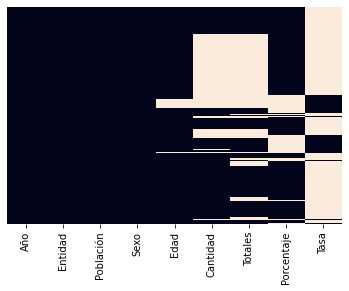

In [25]:
# verificación de nulos
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [36]:
f.completitud(df)

,columna,total,completitud
0,Tasa,57640,18.519670
1,Totales,33088,53.226559
2,Cantidad,28865,59.196223
3,Porcentaje,14632,79.316097
4,Edad,3696,94.775307
5,Año,0,100.000000
6,Entidad,0,100.000000
7,Población,0,100.000000
8,Sexo,0,100.000000


# <font color=#378A87>**1 Análisis Exploratorio**<font>



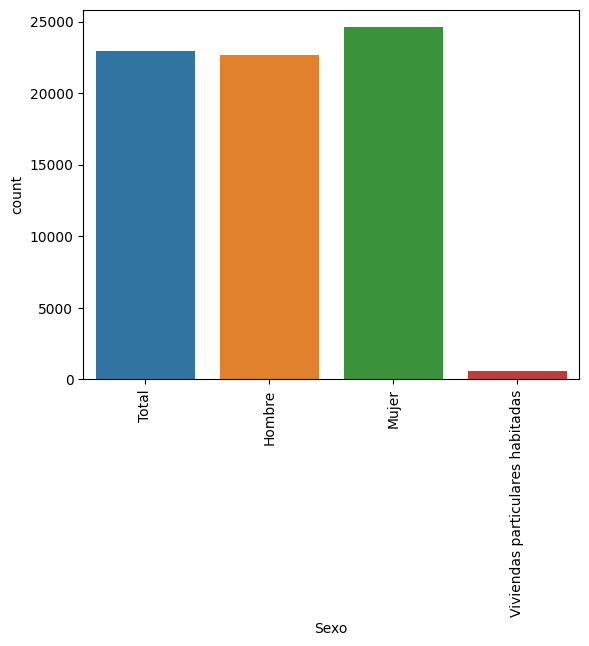

In [53]:
sns.countplot(x='Sexo', data=df)
plt.xticks(rotation=90)
plt.show()

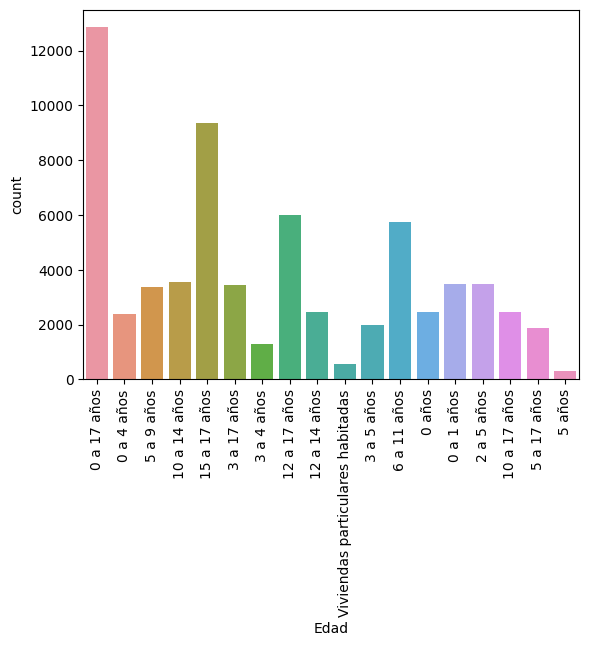

In [52]:
sns.countplot(x='Edad', data=df)
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_12193/2369162231.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



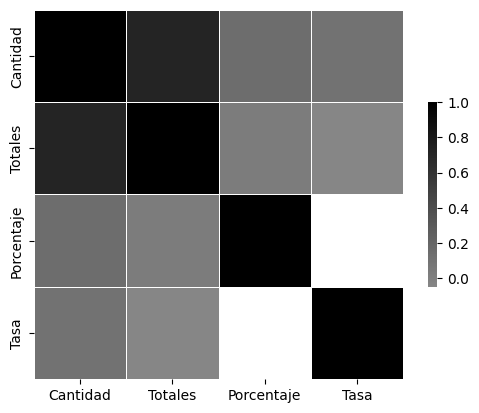

            Cantidad   Totales  Porcentaje      Tasa
Cantidad    1.000000  0.717303    0.147634  0.104534
Totales     0.717303  1.000000    0.028077 -0.048474
Porcentaje  0.147634  0.028077    1.000000       NaN
Tasa        0.104534 -0.048474         NaN  1.000000


In [47]:
# Correlaciones
sns.color_palette("light:b", as_cmap=True)
corrmat = df.corr()

sns.heatmap(corrmat, center=0, cmap='gray_r', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat)

In [48]:
# Número de Entidades
df.Entidad.value_counts()

NACIONAL               2331
YUCATÁN                2183
CHIAPAS                2177
SAN LUIS POTOSÍ        2135
NUEVO LEÓN             2135
OAXACA                 2135
PUEBLA                 2135
QUERÉTARO              2135
QUINTANA ROO           2135
SONORA                 2135
SINALOA                2135
MORELOS                2135
TABASCO                2135
TAMAULIPAS             2135
TLAXCALA               2135
VERACRUZ               2135
NAYARIT                2135
MICHOACÁN              2135
AGUASCALIENTES         2135
MÉXICO                 2135
JALISCO                2135
HIDALGO                2135
GUERRERO               2135
GUANAJUATO             2135
DURANGO                2135
CIUDAD DE MÉXICO       2135
CHIHUAHUA              2135
COLIMA                 2135
COAHUILA               2135
CAMPECHE               2135
BAJA CALIFORNIA SUR    2135
BAJA CALIFORNIA        2135
ZACATECAS              2135
Name: Entidad, dtype: int64

In [58]:
df.Edad.value_counts()

0 a 17 años                         12852
15 a 17 años                         9372
12 a 17 años                         6006
6 a 11 años                          5742
10 a 14 años                         3564
0 a 1 años                           3465
2 a 5 años                           3465
3 a 17 años                          3439
5 a 9 años                           3366
0 años                               2475
10 a 17 años                         2475
12 a 14 años                         2442
0 a 4 años                           2376
3 a 5 años                           1980
5 a 17 años                          1881
3 a 4 años                           1287
Viviendas particulares habitadas      561
5 años                                297
Name: Edad, dtype: int64

******

## <font color=#378A87>**1.1 Outliers**<font>


In [75]:
#Bucando outliers
feats=list((df[["Cantidad","Totales","Porcentaje","Tasa"]]).columns)
outliers=f.search_outliers(df,feats)
outliers

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_Z_Score,n_outliers_IQR_%,n_outliers_Percentil_%,n_outliers_Z_Score_%,total_outliers,%_outliers,indices
0,Cantidad,6731,4111,274,9.51,5.81,0.39,2094,2.96,"[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, ..."
1,Totales,3970,3761,402,5.61,5.32,0.57,1878,2.65,"[0, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
2,Porcentaje,1455,5612,718,2.06,7.93,1.01,177,0.25,"[34304, 70658, 70659, 70665, 70668, 34319, 455..."
3,Tasa,177,1310,146,0.25,1.85,0.21,1455,2.06,"[51129, 59271, 59276, 59280, 11481, 8819, 8824..."


# <font color=#378A87>**2. Transformación de variables**<font>

In [82]:
#Get dictionaries from categorical values

dictEntidad = dict(enumerate(df.Entidad.unique()))
dictEntidad = {y: x for x, y in dictEntidad.items()}

dictPoblacion = dict(enumerate(df.Población.unique()))
dictPoblacion = {y: x for x, y in dictPoblacion.items()}

dictSexo = dict(enumerate(df.Sexo.unique()))
dictSexo = {y: x for x, y in dictSexo.items()}

dictEdad = dict(enumerate(df.Edad.unique()))
dictEdad = {y: x for x, y in dictEdad.items()}

df_num = df
df_num = df_num.replace({"Entidad" : dictEntidad})
df_num = df_num.replace({"Población" : dictPoblacion})
df_num = df_num.replace({"Sexo" : dictSexo})
df_num = df_num.replace({"Edad" : dictEdad})
df_num

,Año,Entidad,Población,Sexo,Edad,Cantidad,Totales,Porcentaje,Tasa
0,2020,0,0,0,0,38247958.0,126014024.0,0.303521,NaN
1,2020,1,0,0,0,463335.0,1425607.0,0.325009,NaN
2,2020,2,0,0,0,1061893.0,3769020.0,0.281742,NaN
3,2020,3,0,0,0,236629.0,798447.0,0.296362,NaN
4,2020,4,0,0,0,286880.0,928363.0,0.309017,NaN
...,...,...,...,...,...,...,...,...,...
70736,2022,28,30,0,4,7.0,188005.0,NaN,3.723305
70737,2022,29,30,0,4,6.0,76163.0,NaN,7.877841
70738,2022,30,30,0,4,19.0,418874.0,NaN,4.535970
70739,2022,31,30,0,4,1.0,120995.0,NaN,0.826480
